In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import json
from scipy import stats

pd.set_option('display.max_columns', None)


In [2]:
PATH = '/media/georgetz/jupyter/Desktop/Classes/Winter 2024/DSC 365 - Data Visualization/Final Project'
os.chdir(PATH)

In [31]:

movies = pd.read_csv(os.path.join(PATH, 'tmdb_5000_movies.csv'))
print(f"Shape: {movies.shape}")
movies.head()

Shape: (4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
credits = pd.read_csv(os.path.join(PATH, 'tmdb_5000_credits.csv'))
print(f"Shape: {credits.shape}")
credits.head()

Shape: (4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [62]:
df = pd.merge(movies, credits, on='title')
print(f"Shape: {df.shape}")
df.head()

Shape: (4809, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [63]:
def convert(obj):
    L = []
    for i in json.loads(obj):
        L.append(i["name"])
    return L

df["genres"] = df["genres"].apply(convert)
df["keywords"] = df["keywords"].apply(convert)
df['PrimaryGenre'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Action
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Adventure
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Action
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Action
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Action


In [71]:
def update_cast(key: str, value: int):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip())
        return result
    return inner_function

In [74]:
df['cast'] = df['cast'].apply(update_cast('order', value=5))
df['cast'].head()

0    [Sam Worthington, Zoe Saldana, Sigourney Weave...
1    [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2    [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3    [Christian Bale, Michael Caine, Gary Oldman, A...
4    [Taylor Kitsch, Lynn Collins, Samantha Morton,...
Name: cast, dtype: object

In [77]:
def update_crew(key: str, values: List[str]):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] in values:
                result.append(item['name'].strip())
        return result
    return inner_function

In [84]:
df['Directors'] = df['crew'].apply(update_crew('job', values=['Director']))
df['PrimaryDirector'] = df['Directors'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)
df[['Directors', 'PrimaryDirector']].head()

,Directors,PrimaryDirector
0,[James Cameron],James Cameron
1,[Gore Verbinski],Gore Verbinski
2,[Sam Mendes],Sam Mendes
3,[Christopher Nolan],Christopher Nolan
4,[Andrew Stanton],Andrew Stanton


In [86]:
df['Producers'] = df['crew'].apply(update_crew('job', values=['Producer']))
df['PrimaryProducer'] = df['Producers'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)
df[['Producers', 'PrimaryProducer']].head()

,Producers,PrimaryProducer
0,"[James Cameron, Jon Landau]",James Cameron
1,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",Jerry Bruckheimer
2,"[Barbara Broccoli, Michael G. Wilson]",Barbara Broccoli
3,"[Charles Roven, Christopher Nolan, Emma Thomas]",Charles Roven
4,"[Colin Wilson, Jim Morris, Lindsey Collins]",Colin Wilson


In [87]:
df['crew'] = df['crew'].apply(update_crew('job', values=['Screenplay', 'Producer', 'Editor', 'Writer', 'Director']))
df['crew'].head()

0    [Stephen E. Rivkin, James Cameron, James Camer...
1    [Gore Verbinski, Jerry Bruckheimer, Ted Elliot...
2    [Sam Mendes, John Logan, Lee Smith, Barbara Br...
3    [Charles Roven, Christopher Nolan, Christopher...
4    [Andrew Stanton, Andrew Stanton, Colin Wilson,...
Name: crew, dtype: object

In [97]:
def update_production_companies(key: str):
    def inner_function(json_string: str):
        result = []
        for item in ast.literal_eval(json_string):
            if item[key] <= value:
                result.append(item['name'].strip())
        return result
    return inner_function

In [112]:
df['production_companies'] = df.production_companies.apply(lambda x: [i['name'] for i in ast.literal_eval(x)])
df['PrimaryProductionCompany'] = df['production_companies'].apply(lambda x: x[0]  if len(x) > 0 else None)
df[['production_companies', 'PrimaryProductionCompany']].head()

,production_companies,PrimaryProductionCompany
0,"[Ingenious Film Partners, Twentieth Century Fo...",Ingenious Film Partners
1,"[Walt Disney Pictures, Jerry Bruckheimer Films...",Walt Disney Pictures
2,"[Columbia Pictures, Danjaq, B24]",Columbia Pictures
3,"[Legendary Pictures, Warner Bros., DC Entertai...",Legendary Pictures
4,[Walt Disney Pictures],Walt Disney Pictures


In [116]:
pd.set_option('display.max_columns', 500)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, James Cameron, James Camer...",Action,[James Cameron],James Cameron,"[James Cameron, Jon Landau]",James Cameron,Ingenious Film Partners
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot...",Adventure,[Gore Verbinski],Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",Jerry Bruckheimer,Walt Disney Pictures
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Lee Smith, Barbara Br...",Action,[Sam Mendes],Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]",Barbara Broccoli,Columbia Pictures
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher...",Action,[Christopher Nolan],Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]",Charles Roven,Legendary Pictures
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, Colin Wilson,...",Action,[Andrew Stanton],Andrew Stanton,"[Colin Wilson, Jim Morris, Lindsey Collins]",Colin Wilson,Walt Disney Pictures


In [124]:
df['spoken_languages'] = df.spoken_languages.apply(lambda x: [i['name'] for i in ast.literal_eval(x)] )


In [129]:
df['production_countries'] = df.production_countries.apply(lambda x: [i['name'] for i in ast.literal_eval(x)] )
df['PrimaryProductionCountry'] = df['production_countries'].apply(lambda x: x[0] if  len(x) > 0 else None)
df[['production_countries', 'PrimaryProductionCountry']].head()

,production_countries,PrimaryProductionCountry
0,"[United States of America, United Kingdom]",United States of America
1,[United States of America],United States of America
2,"[United Kingdom, United States of America]",United Kingdom
3,[United States of America],United States of America
4,[United States of America],United States of America


In [130]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, James Cameron, James Camer...",Action,[James Cameron],James Cameron,"[James Cameron, Jon Landau]",James Cameron,Ingenious Film Partners,United States of America
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot...",Adventure,[Gore Verbinski],Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",Jerry Bruckheimer,Walt Disney Pictures,United States of America
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Lee Smith, Barbara Br...",Action,[Sam Mendes],Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]",Barbara Broccoli,Columbia Pictures,United Kingdom
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher...",Action,[Christopher Nolan],Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]",Charles Roven,Legendary Pictures,United States of America
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, Colin Wilson,...",Action,[Andrew Stanton],Andrew Stanton,"[Colin Wilson, Jim Morris, Lindsey Collins]",Colin Wilson,Walt Disney Pictures,United States of America


In [131]:
df.to_csv(os.path.join(PATH, 'movies_complete.csv'), index=False)

# Load Dataset

In [5]:
df = pd.read_csv(os.path.join(PATH, 'movies_complete.csv'))
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['Stephen E. Rivkin', 'James Cameron', 'James ...",Action,['James Cameron'],James Cameron,"['James Cameron', 'Jon Landau']",James Cameron,Ingenious Film Partners,United States of America
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['Gore Verbinski', 'Jerry Bruckheimer', 'Ted E...",Adventure,['Gore Verbinski'],Gore Verbinski,"['Jerry Bruckheimer', 'Eric McLeod', 'Chad Oma...",Jerry Bruckheimer,Walt Disney Pictures,United States of America
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","['Sam Mendes', 'John Logan', 'Lee Smith', 'Bar...",Action,['Sam Mendes'],Sam Mendes,"['Barbara Broccoli', 'Michael G. Wilson']",Barbara Broccoli,Columbia Pictures,United Kingdom
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","['Charles Roven', 'Christopher Nolan', 'Christ...",Action,['Christopher Nolan'],Christopher Nolan,"['Charles Roven', 'Christopher Nolan', 'Emma T...",Charles Roven,Legendary Pictures,United States of America
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","['Andrew Stanton', 'Andrew Stanton', 'Colin Wi...",Action,['Andrew Stanton'],Andrew Stanton,"['Colin Wilson', 'Jim Morris', 'Lindsey Collins']",Colin Wilson,Walt Disney Pictures,United States of America


In [6]:
df.isnull().sum().sort_values(ascending=False)

homepage                    3096
PrimaryProducer             1023
tagline                      844
PrimaryProductionCompany     352
PrimaryProductionCountry     174
PrimaryDirector               30
PrimaryGenre                  28
overview                       3
runtime                        2
release_date                   1
Producers                      0
vote_average                   0
crew                           0
cast                           0
movie_id                       0
vote_count                     0
Directors                      0
budget                         0
title                          0
genres                         0
spoken_languages               0
revenue                        0
production_countries           0
production_companies           0
popularity                     0
original_title                 0
original_language              0
keywords                       0
id                             0
status                         0
dtype: int

In [7]:
for coli in df.columns:
    df[coli].replace('[]', np.nan, inplace=True)

In [8]:
df.budget.replace(0, np.nan, inplace=True)
df.revenue.replace(0, np.nan, inplace=True)

In [22]:
print(np.min(df.budget))
print(np.max(df.budget))

1.0
380000000.0


In [10]:
df.release_date = pd.to_datetime(df.release_date)

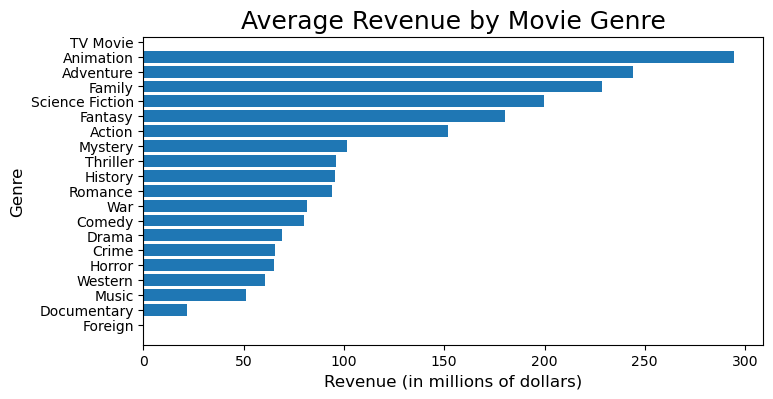

In [11]:
tmp = df.groupby('PrimaryGenre')['revenue'].mean().sort_values()
tmp = tmp / 1000000
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(tmp.index, tmp.values)
ax.set_xlabel('Revenue (in millions of dollars)', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Average Revenue by Movie Genre', fontsize=18)
fig.savefig('mean_revenue_by_genre.png')
plt.show()

In [15]:
numeric_features = df.select_dtypes(exclude='object').drop(columns=['id', 'movie_id', 'release_date']).columns.to_list()
print(len(numeric_features))
print(numeric_features)

6
['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']


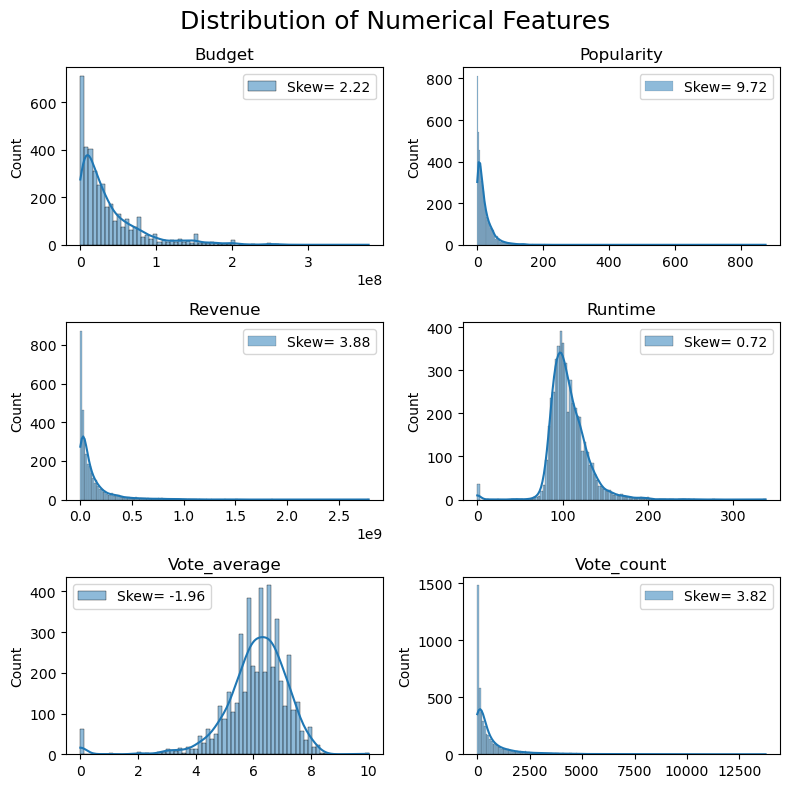

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(8,8))
for coli, axi in zip(numeric_features, ax.ravel()):
    skew = stats.skew(df[coli], nan_policy='omit')
    sns.histplot(df[coli], kde=True, ax=axi, label=f"Skew= {np.round(skew, 2)}")
    axi.set_title(coli.capitalize(), fontsize=12)
    axi.set_xlabel('')
    axi.legend()
    
fig.suptitle('Distribution of Numerical Features', fontsize=18)
fig.tight_layout()
fig.savefig('numeric_distributions.png')
plt.show()

In [121]:
df[df.release_date.isna()]['release_date']

4559   NaT
Name: release_date, dtype: datetime64[ns]

In [23]:
def get_season(dates):
    # Define the start month and day for each season
    seasons = {'spring': (3, 1), 'summer': (6, 1), 'autumn': (9, 1), 'winter': (12, 1)}
    
    # Map each season to its respective months
    month_to_season = {}
    for season, (start_month, _) in seasons.items():
        if season == 'winter':
            month_to_season[1] = month_to_season[2] = month_to_season[12] = season
        elif season == 'spring':
            month_to_season[3] = month_to_season[4] = month_to_season[5] = season
        elif season == 'summer':
            month_to_season[6] = month_to_season[7] = month_to_season[8] = season
        elif season == 'autumn':
            month_to_season[9] = month_to_season[10] = month_to_season[11] = season
            
    
    # Apply the mapping to each date
    return dates.map(lambda x: month_to_season.get(x.month, 'unknown') if pd.notna(x) else np.nan)

In [24]:
df['release_year'] = df.release_date.dt.year
df['release_month'] = df.release_date.dt.strftime('%B')
df['release_season'] = get_season(df.release_date)
df[['release_date', 'release_year', 'release_month', 'release_season']].head()

,release_date,release_year,release_month,release_season
0,2009-12-10,2009.0,December,winter
1,2007-05-19,2007.0,May,spring
2,2015-10-26,2015.0,October,autumn
3,2012-07-16,2012.0,July,summer
4,2012-03-07,2012.0,March,spring


In [175]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'PrimaryGenre', 'Directors',
       'PrimaryDirector', 'Producers', 'PrimaryProducer',
       'PrimaryProductionCompany', 'PrimaryProductionCountry', 'release_year',
       'release_month', 'release_season', 'profit'],
      dtype='object')

In [25]:
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['crew'] = df['crew'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['Directors'] = df['Directors'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['Producers'] = df['Producers'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['production_countries'] = df['production_countries'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)

In [26]:
df2 = df.copy()

In [27]:
df2.isnull().sum().sort_values(ascending=False)

homepage                    3096
revenue                     1430
budget                      1039
PrimaryProducer             1023
Producers                   1023
tagline                      844
keywords                     412
production_companies         352
PrimaryProductionCompany     352
PrimaryProductionCountry     174
production_countries         174
spoken_languages              86
cast                          45
PrimaryDirector               30
Directors                     30
crew                          29
genres                        28
PrimaryGenre                  28
overview                       3
runtime                        2
release_year                   1
release_date                   1
release_month                  1
release_season                 1
id                             0
original_title                 0
movie_id                       0
vote_average                   0
title                          0
status                         0
original_l

In [28]:
import requests

In [29]:
API_KEY = 'ec619fb3830712e3767e7582898a8592'

In [30]:
def get_budget(movie_id, api_key=API_KEY):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        budget = data['budget']
        if budget == 0:
            return np.nan
        return budget
    else:
        return np.nan

In [31]:
missing_budget_indices = df2[df2.budget.isna()].index
for i in missing_budget_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'budget'] = get_budget(movieid)
    except:
        print(i)
        break


In [104]:
def get_revenue(movie_id, api_key=API_KEY):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        revenue = data['revenue']
        if revenue == 0:
            return np.nan
        return revenue
    else:
        return np.nan

In [105]:
missing_revenue_indices = df2[df2.revenue.isna()].index
for i in missing_revenue_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'revenue'] = get_revenue(movieid)
    except:
        print(i)
        break

In [103]:
get_revenue(df2.loc[83, 'id'])

TypeError: get_revenue() missing 1 required positional argument: 'dict_key'

In [274]:
requests.get(f'https://api.themoviedb.org/3/movie/{17979}?api_key={API_KEY}').json().keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [99]:
requests.get(f'https://api.themoviedb.org/3/movie/{17979}/credits?api_key={API_KEY}').json().keys()

dict_keys(['id', 'cast', 'crew'])

In [70]:
def get_producers(movie_id, api_key=API_KEY):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}/credits?api_key={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        producers = [member['name'] for member in data['crew'] if member['job'] == 'Producer']
        if len(producers) == 0:
            return np.nan
        return str(producers)
    else:
        return np.nan

In [71]:
missing_producer_indices = df2[df2.Producers.isna()].index
for i in missing_producer_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'Producers'] = get_producers(movieid)
    except:
        print(i)
        print(movieid)
        break

In [96]:
def get_tagline(movie_id, api_key=API_KEY):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        tagline = data['tagline']
        if tagline is not np.nan:
            if len(tagline) == 0:
                return np.nan
        return tagline
    else:
        return np.nan

In [97]:
missing_tagline_indices = df2[df2.tagline.isna()].index
for i in missing_tagline_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'tagline'] = get_tagline(movieid)
    except:
        print(i)
        break

In [111]:
def get_production_companies(movie_id, api_key=API_KEY):
    # Accessing the main movie details endpoint
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Extracting production companies
        production_companies = [company['name'] for company in data.get('production_companies', [])]
        
        if not production_companies:
            return np.nan
        return str(production_companies)
    else:
        return np.nan

In [113]:
missing_production_companies_indices = df2[df2.production_companies.isna()].index
for i in missing_production_companies_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'production_companies'] = get_production_companies(movieid)
    except:
        print(i)
        break

In [114]:
df2.loc[missing_production_companies_indices, 'production_companies']

1014                                                  NaN
1366                       ['ransom films', 'Atresmedia']
1675    ['21 Century Shengkai Film', 'Capgen Investmen...
1760    ['Alcon Entertainment', 'Di Novi Pictures', 'A...
1904    ['Warner Bros. Pictures', 'Village Roadshow Pi...
                              ...                        
4792                                                  NaN
4795    ['Rectangle Productions', 'Haystack Production...
4803                                    ['Gorilla Films']
4805                   ['Marlboro Road Gang Productions']
4807                                                  NaN
Name: production_companies, Length: 352, dtype: object

In [116]:
def get_production_countries(movie_id, api_key=API_KEY):
    # Accessing the main movie details endpoint
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Extracting production companies
        production_countries = [company['name'] for company in data.get('production_countries', [])]
        
        if not production_countries:
            return np.nan
        return str(production_countries)
    else:
        return np.nan

In [117]:
missing_production_countries_indices = df2[df2.production_countries.isna()].index
for i in missing_production_countries_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'production_countries'] = get_production_countries(movieid)
    except:
        print(i)
        break

In [39]:
r = requests.get(f"https://api.themoviedb.org/3/movie/{17979}/credits?api_key={API_KEY}").json()
[member['name'] for member in r['crew'] if member['job'] == 'Producer']

['Robert Zemeckis', 'Steve Starkey', 'Jack Rapke']

In [150]:
a = df.isnull().sum().sort_values(ascending=False)
b = df2.isnull().sum().sort_values(ascending=False)
pd.concat([a[a != 0], b[b != 0]], axis=1)

,0,1
homepage,3096,3096
revenue,1430,847
budget,1039,645
PrimaryProducer,1023,324
Producers,1023,324
tagline,844,491
keywords,412,412
production_companies,352,163
PrimaryProductionCompany,352,163
PrimaryProductionCountry,174,87


In [143]:
df2.loc[60, 'Producers']

"['Robert Zemeckis', 'Steve Starkey', 'Jack Rapke']"

In [149]:
df2['PrimaryProductionCompany'] = df2['production_companies'].apply(lambda x: x[0]  if x is not np.nan and len(x) > 0 else None)
df2['PrimaryProducer'] = df2['Producers'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)
df2['PrimaryDirector'] = df2['Directors'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)
df2['PrimaryGenre'] = df2['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>=1 else None)

In [152]:
df2.drop(columns='homepage', inplace=True)

In [146]:
df2 = pd.read_csv('temp.csv')
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry,release_year,release_month,release_season
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['Stephen E. Rivkin', 'James Cameron', 'James ...",Action,['James Cameron'],James Cameron,"['James Cameron', 'Jon Landau']",James Cameron,Ingenious Film Partners,United States of America,2009.0,December,winter
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['Gore Verbinski', 'Jerry Bruckheimer', 'Ted E...",Adventure,['Gore Verbinski'],Gore Verbinski,"['Jerry Bruckheimer', 'Eric McLeod', 'Chad Oma...",Jerry Bruckheimer,Walt Disney Pictures,United States of America,2007.0,May,spring
2,245000000.0,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","['Sam Mendes', 'John Logan', 'Lee Smith', 'Bar...",Action,['Sam Mendes'],Sam Mendes,"['Barbara Broccoli', 'Michael G. Wilson']",Barbara Broccoli,Columbia Pictures,United Kingdom,2015.0,October,autumn
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","['Charles Roven', 'Christopher Nolan', 'Christ...",Action,['Christopher Nolan'],Christopher Nolan,"['Charles Roven', 'Christopher Nolan', 'Emma T...",Charles Roven,Legendary Pictures,United States of America,2012.0,July,summer
4,260000000.0,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,2.841391e+08,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","['Andrew Stanton', 'Andrew Stanton', 'Colin Wi...",Action,['Andrew Stanton'],Andrew Stanton,"['Colin Wilson', 'Jim Morris', 'Lindsey Collins']",Colin Wilson,Walt Disney Pictures,United States of America,2012.0,March,spring


In [154]:
a = df.isnull().sum().sort_values(ascending=False)
b = df2.isnull().sum().sort_values(ascending=False)
pd.concat([a[a != 0], b[b != 0]], axis=1)

,0,1
homepage,3096,NaN
revenue,1430,847.0
budget,1039,645.0
PrimaryProducer,1023,324.0
Producers,1023,324.0
tagline,844,491.0
keywords,412,412.0
production_companies,352,163.0
PrimaryProductionCompany,352,163.0
PrimaryProductionCountry,174,87.0


In [ ]:
def get_revenue(movie_id, api_key=API_KEY):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        revenue = data['revenue']
        if revenue == 0:
            return np.nan
        return revenue
    else:
        return np.nan

In [ ]:
missing_revenue_indices = df2[df2.revenue.isna()].index
for i in missing_revenue_indices:
    movieid = df2.loc[i, 'id']
    try:
        df2.loc[i, 'revenue'] = get_revenue(movieid)
    except:
        print(i)
        break

In [158]:
missing_revenue_indices = df2[df2.revenue.isna()].index
df2.loc[list(missing_revenue_indices)[:5], 'id']

83      79698
309     10214
463    161795
467      9822
474    330770
Name: id, dtype: int64

In [163]:
requests.get(f'https://api.themoviedb.org/3/movie/{79698}?api_key={API_KEY}').json()['imdb_id']

'tt1321869'

In [164]:
def get_imdb_id(movie_id, api_key=API_KEY):
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'

    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        imdb_id = data['imdb_id']
        return imdb_id
    else:
        return np.nan

In [171]:
OMDB_API_KEY = '783f56d8'

In [166]:
df2['imdb_id'] = df2.id.apply(lambda x: get_imdb_id(x))

In [169]:
df2.imdb_id[0]

'tt0499549'

In [180]:
df2[['title', 'id', 'imdb_id',  'revenue']]

,title,id,imdb_id,revenue
0,Avatar,19995,tt0499549,2.787965e+09
1,Pirates of the Caribbean: At World's End,285,tt0449088,9.610000e+08
2,Spectre,206647,tt2379713,8.806746e+08
3,The Dark Knight Rises,49026,tt1345836,1.084939e+09
4,John Carter,49529,tt0401729,2.841391e+08
...,...,...,...,...
4804,El Mariachi,9367,tt0104815,2.040920e+06
4805,Newlyweds,72766,tt1880418,5.000000e+03
4806,"Signed, Sealed, Delivered",231617,tt3000844,NaN
4807,Shanghai Calling,126186,tt2070597,NaN


In [189]:
def get_omdb_details(imdb_id, api_key=OMDB_API_KEY):
    url = f"http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}"
    response = requests.get(url)
    return response.json()

In [190]:
df2.imdb_id[:5].apply(lambda x: get_omdb_details(x))

0    {'Response': 'False', 'Error': 'Invalid API ke...
1    {'Title': 'Pirates of the Caribbean: At World'...
2    {'Title': 'Spectre', 'Year': '2015', 'Rated': ...
3    {'Title': 'The Dark Knight Rises', 'Year': '20...
4    {'Title': 'John Carter', 'Year': '2012', 'Rate...
Name: imdb_id, dtype: object

In [181]:
url = f"http://www.omdbapi.com/?i={'tt0499549'}&apikey={OMDB_API_KEY}"
response = requests.get(url)

In [198]:
omdb_df = df2[['imdb_id']].copy()
omdb_df

,imdb_id
0,tt0499549
1,tt0449088
2,tt2379713
3,tt1345836
4,tt0401729
...,...
4804,tt0104815
4805,tt1880418
4806,tt3000844
4807,tt2070597


In [203]:
omdb_df.result

0       {'Title': 'Avatar', 'Year': '2009', 'Rated': '...
1       {'Title': 'Pirates of the Caribbean: At World'...
2       {'Title': 'Spectre', 'Year': '2015', 'Rated': ...
3       {'Title': 'The Dark Knight Rises', 'Year': '20...
4       {'Title': 'John Carter', 'Year': '2012', 'Rate...
                              ...                        
4804    {'Response': 'False', 'Error': 'Request limit ...
4805    {'Response': 'False', 'Error': 'Request limit ...
4806    {'Response': 'False', 'Error': 'Request limit ...
4807    {'Response': 'False', 'Error': 'Request limit ...
4808    {'Response': 'False', 'Error': 'Request limit ...
Name: result, Length: 4809, dtype: object

In [216]:
omdb_df.result[5]['Response']

'True'

In [271]:
omdb_df.result = results

In [256]:
pd.Series([i['Response'] for i in omdb_df.result]).value_counts()

True     2994
False    1815
dtype: int64

In [ ]:
results = omdb_df.result

In [266]:
OMDB_API_KEY2 = '1516e7f1'

In [269]:
for i in range(omdb_df.shape[0]):
    if omdb_df.loc[i, 'result'] is np.nan:
        continue
    if omdb_df.loc[i, 'result']['Response'] == 'False':
        omdb_return = get_omdb_details(omdb_df.loc[i, 'imdb_id'], api_key=OMDB_API_KEY2)
        if omdb_return['Response'] == 'True':
            results[i] = omdb_return
        else:
            if omdb_return['Error'] == 'Incorrect IMDb ID.':
                results[i] = np.nan
                continue
            else:
                break

In [270]:
pd.Series([i['Response'] for i in results if i is not np.nan]).value_counts()

True    4802
dtype: int64

In [300]:
omdb_df[omdb_df.result.isna()].index

,imdb_id,result
2637,NaN,NaN
3213,NaN,NaN
3290,NaN,NaN
3297,NaN,NaN
3515,NaN,NaN
3859,NaN,NaN
3955,NaN,NaN


In [301]:
for indexi in omdb_df[omdb_df.result.isna()].index:
    results[indexi] = {keyi: np.nan for keyi in results[0].keys()}

In [304]:
omdb_df.loc[[2637,3213,3290,3297,3515,3859,3955]]

,imdb_id,result
2637,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3213,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3290,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3297,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3515,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3859,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."
3955,NaN,"{'Title': nan, 'Year': nan, 'Rated': nan, 'Rel..."


In [305]:
omdb_df.to_csv('omdb_results.csv', index=False)

In [306]:
pd.DataFrame(omdb_df.result)

,result
0,"{'Title': 'Avatar', 'Year': '2009', 'Rated': '..."
1,{'Title': 'Pirates of the Caribbean: At World'...
2,"{'Title': 'Spectre', 'Year': '2015', 'Rated': ..."
3,"{'Title': 'The Dark Knight Rises', 'Year': '20..."
4,"{'Title': 'John Carter', 'Year': '2012', 'Rate..."
...,...
4804,"{'Title': 'El Mariachi', 'Year': '1992', 'Rate..."
4805,"{'Title': 'Newlyweds', 'Year': '2011', 'Rated'..."
4806,"{'Title': 'Signed Sealed Delivered', 'Year': '..."
4807,"{'Title': 'Shanghai Calling', 'Year': '2012', ..."


In [311]:
omdb_df = pd.json_normalize(results)
omdb_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons
0,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",A paraplegic Marine dispatched to the moon Pan...,"English, Spanish",United States,Won 3 Oscars. 90 wins & 131 nominations total,https://m.media-amazon.com/images/M/MV5BZDA0OG...,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.9,"1,374,723",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True,NaN
1,Pirates of the Caribbean: At World's End,2007,PG-13,25 May 2007,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Stuart Beattie","Johnny Depp, Orlando Bloom, Keira Knightley","Captain Barbossa, Will Turner and Elizabeth Sw...",English,United States,Nominated for 2 Oscars. 23 wins & 51 nominatio...,https://m.media-amazon.com/images/M/MV5BMjIyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",50,7.1,"686,029",tt0449088,movie,01 Jan 2014,"$309,420,425",N/A,N/A,True,NaN
2,Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan, Neal Purvis, Robert Wade","Daniel Craig, Christoph Waltz, Léa Seydoux",A cryptic message from James Bond's past sends...,"English, German, Italian, Spanish, French, Ukr...","United Kingdom, United States",Won 1 Oscar. 8 wins & 37 nominations total,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"462,861",tt2379713,movie,24 Jul 2016,"$200,074,609",N/A,N/A,True,NaN
3,The Dark Knight Rises,2012,PG-13,20 Jul 2012,164 min,"Action, Drama, Thriller",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Tom Hardy, Anne Hathaway","Eight years after the Joker's reign of chaos, ...","English, Arabic","United States, United Kingdom",Nominated for 1 BAFTA Award43 wins & 104 nomin...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,"[{'Source': 'Internet Movie Database', 'Value'...",78,8.4,"1,805,388",tt1345836,movie,07 Jan 2014,"$448,149,584",N/A,N/A,True,NaN
4,John Carter,2012,PG-13,09 Mar 2012,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton, Mark Andrews, Michael Chabon","Taylor Kitsch, Lynn Collins, Willem Dafoe","Transported to Barsoom, a Civil War vet discov...",English,United States,2 wins & 8 nominations,https://m.media-amazon.com/images/M/MV5BMDEwZm...,"[{'Source': 'Internet Movie Database', 'Value'...",51,6.6,"284,599",tt0401729,movie,01 Jan 2014,"$73,078,100",N/A,N/A,True,NaN


In [347]:
print(omdb_df.Awards[:50])

0         Won 3 Oscars. 90 wins & 131 nominations total
1     Nominated for 2 Oscars. 23 wins & 51 nominatio...
2            Won 1 Oscar. 8 wins & 37 nominations total
3     Nominated for 1 BAFTA Award43 wins & 104 nomin...
4                                2 wins & 8 nominations
5     Nominated for 1 BAFTA Award4 wins & 44 nominat...
6     Nominated for 1 Oscar. 10 wins & 42 nomination...
7                               8 wins & 52 nominations
8     Nominated for 1 Oscar. 9 wins & 39 nominations...
9                              14 wins & 33 nominations
10    Nominated for 1 Oscar. 12 wins & 47 nomination...
11    Nominated for 2 BAFTA 4 wins & 32 nominations ...
12          Won 1 Oscar. 45 wins & 54 nominations total
13    Nominated for 2 Oscars. 6 wins & 23 nomination...
14    Nominated for 1 BAFTA Award7 wins & 46 nominat...
15                              4 wins & 21 nominations
16    Nominated for 1 Oscar. 38 wins & 81 nomination...
17                              3 wins & 31 nomi

In [361]:
omdb_df.Awards.isnull().value_counts()

False    4203
True      606
Name: Awards, dtype: int64

In [446]:
import re
# for i in omdb_df.Awards:
#     print(i)
    
awards = omdb_df.Awards.apply(lambda x: re.findall('\d+ win', x) if x is not np.nan else np.nan)
for i in range(len(awards)):
    if awards[i] is not np.nan:
        if len(awards[i]) > 0:
            awards[i] = awards[i][0].split()[0]
        else:
            awards[i] = 0
    else:
        awards[i] = np.nan

In [463]:
awards[awards == 164]

1835    164.0
Name: Awards, dtype: float64

In [465]:
df2['NumAwards'] = awards

In [470]:
oscars = omdb_df.Awards.apply(lambda x: re.findall('\d+ Oscar', x) if x is not np.nan else np.nan)
for i in range(len(oscars)):
    if oscars[i] is not np.nan:
        if len(oscars[i]) > 0:
            oscars[i] = oscars[i][0].split()[0]
        else:
            oscars[i] = 0
    else:
        oscars[i] = np.nan

In [477]:
df2

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry,release_year,release_month,release_season,imdb_id,NumAwards,Rated,BoxOfficeRevenue,NumOscars
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, James Cameron, James Camer...",Action,[James Cameron],James Cameron,"[James Cameron, Jon Landau]",James Cameron,Ingenious Film Partners,United States of America,2009.0,December,winter,tt0499549,90.0,PG-13,785221649,3.0
1,300000000.0,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot...",Adventure,[Gore Verbinski],Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",Jerry Bruckheimer,Walt Disney Pictures,United States of America,2007.0,May,spring,tt0449088,23.0,PG-13,309420425,2.0
2,245000000.0,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Lee Smith, Barbara Br...",Action,[Sam Mendes],Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]",Barbara Broccoli,Columbia Pictures,United Kingdom,2015.0,October,autumn,tt2379713,8.0,PG-13,200074609,1.0
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher...",Action,[Christopher Nolan],Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]",Charles Roven,Legendary Pictures,United States of America,2012.0,July,summer,tt1345836,43.0,PG-13,448149584,0.0
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, Colin Wilson,...",Action,[Andrew Stanton],Andrew Stanton,"[Colin Wilson, Jim Morris, Lindsey Collins]",Colin Wilson,Walt Disney Pictures,United States of America,2012.0,March,spring,tt0401729,2.0,PG-13,73078100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [441]:
omdb_df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,totalSeasons
0,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",A paraplegic Marine dispatched to the moon Pan...,"English, Spanish",United States,Won 3 Oscars. 90 wins & 131 nominations total,https://m.media-amazon.com/images/M/MV5BZDA0OG...,"[{'Source': 'Internet Movie Database', 'Value'...",83,7.9,"1,374,723",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True,NaN
1,Pirates of the Caribbean: At World's End,2007,PG-13,25 May 2007,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Stuart Beattie","Johnny Depp, Orlando Bloom, Keira Knightley","Captain Barbossa, Will Turner and Elizabeth Sw...",English,United States,Nominated for 2 Oscars. 23 wins & 51 nominatio...,https://m.media-amazon.com/images/M/MV5BMjIyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",50,7.1,"686,029",tt0449088,movie,01 Jan 2014,"$309,420,425",N/A,N/A,True,NaN
2,Spectre,2015,PG-13,06 Nov 2015,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan, Neal Purvis, Robert Wade","Daniel Craig, Christoph Waltz, Léa Seydoux",A cryptic message from James Bond's past sends...,"English, German, Italian, Spanish, French, Ukr...","United Kingdom, United States",Won 1 Oscar. 8 wins & 37 nominations total,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,"[{'Source': 'Internet Movie Database', 'Value'...",60,6.8,"462,861",tt2379713,movie,24 Jul 2016,"$200,074,609",N/A,N/A,True,NaN
3,The Dark Knight Rises,2012,PG-13,20 Jul 2012,164 min,"Action, Drama, Thriller",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Tom Hardy, Anne Hathaway","Eight years after the Joker's reign of chaos, ...","English, Arabic","United States, United Kingdom",Nominated for 1 BAFTA Award43 wins & 104 nomin...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,"[{'Source': 'Internet Movie Database', 'Value'...",78,8.4,"1,805,388",tt1345836,movie,07 Jan 2014,"$448,149,584",N/A,N/A,True,NaN
4,John Carter,2012,PG-13,09 Mar 2012,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton, Mark Andrews, Michael Chabon","Taylor Kitsch, Lynn Collins, Willem Dafoe","Transported to Barsoom, a Civil War vet discov...",English,United States,2 wins & 8 nominations,https://m.media-amazon.com/images/M/MV5BMDEwZm...,"[{'Source': 'Internet Movie Database', 'Value'...",51,6.6,"284,599",tt0401729,movie,01 Jan 2014,"$73,078,100",N/A,N/A,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,El Mariachi,1992,R,26 Feb 1993,81 min,"Action, Crime, Thriller",Robert Rodriguez,Robert Rodriguez,"Carlos Gallardo, Consuelo Gómez, Jaime de Hoyos",A traveling mariachi is mistaken for a murdero...,"Spanish, English","Mexico, United States",7 wins & 4 nominations,https://m.media-amazon.com/images/M/MV5BNjMwNz...,"[{'Source': 'Internet Movie Database', 'Value'...",73,6.8,"70,737",tt0104815,movie,16 Apr 2012,"$2,040,920",N/A,N/A,True,NaN
4805,Newlyweds,2011,Not Rated,26 Dec 2011,95 min,"Comedy, Drama",Edward Burns,Edward Burns,"Edward Burns, Caitlin FitzGerald, Kerry Bishé",Newlyweds Buzzy and Katie find their blissful ...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMjAzNT...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,6.3,"1,663",tt1880418,movie,19 Nov 2012,"$5,000",N/A,N/A,True,NaN
4806,Signed Sealed Delivered,2013,Not Rated,12 Oct 2013,87 min,"Comedy, Drama",Scott Smith,"Martha Williamson, Brandi Harkonen (story editor)","Eric Mabius, Kristin Booth, Yan-Kay Crystal Lo...",A two-hour backdoor pilot of the TV series wit...,English,Canada,2 nominations.,https://m.media-amazon.com/images/M/MV5BNDc5OD...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,7.7

In [444]:
df2.isnull().sum().sort_values(ascending=False)

NumAwards                   1545
revenue                      847
budget                       645
tagline                      491
keywords                     412
PrimaryProducer              324
Producers                    324
PrimaryProductionCompany     163
production_companies         163
production_countries          87
PrimaryProductionCountry      87
spoken_languages              86
cast                          45
PrimaryDirector               30
Directors                     30
crew                          29
genres                        28
PrimaryGenre                  28
BoxOfficeRevenue               9
Rated                          7
imdb_id                        7
overview                       3
runtime                        2
release_year                   1
release_date                   1
release_season                 1
release_month                  1
movie_id                       0
id                             0
original_title                 0
original_l

In [490]:
df2[['release_year', 'release_month', 'release_season', 'NumAwards', 'Rated', 'BoxOfficeRevenue', 'NumOscars', 'profit']]

,release_year,release_month,release_season,NumAwards,Rated,BoxOfficeRevenue,NumOscars,profit
0,2009.0,December,winter,90.0,PG-13,785221649,3.0,2.550965e+09
1,2007.0,May,spring,23.0,PG-13,309420425,2.0,6.610000e+08
2,2015.0,October,autumn,8.0,PG-13,200074609,1.0,6.356746e+08
3,2012.0,July,summer,43.0,PG-13,448149584,0.0,8.349391e+08
4,2012.0,March,spring,2.0,PG-13,73078100,0.0,2.413910e+07
...,...,...,...,...,...,...,...,...
4804,1992.0,September,autumn,7.0,R,2040920,0.0,1.820920e+06
4805,2011.0,December,winter,NaN,Not Rated,5000,NaN,-4.000000e+03
4806,2013.0,October,autumn,0.0,Not Rated,N/A,0.0,NaN
4807,2012.0,May,spring,7.0,PG-13,10400,0.0,NaN


In [491]:
df2.to_csv('movies_complete_02242024.csv', index=False)

In [495]:
df2

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry,release_year,release_month,release_season,imdb_id,NumAwards,Rated,BoxOfficeRevenue,NumOscars,Poster,profit
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2.787965e+09,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, James Cameron, James Camer...",Action,[James Cameron],James Cameron,"[James Cameron, Jon Landau]",James Cameron,Ingenious Film Partners,United States of America,2009.0,December,winter,tt0499549,90.0,PG-13,785221649,3.0,https://m.media-amazon.com/images/M/MV5BZDA0OG...,2.550965e+09
1,300000000.0,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,9.610000e+08,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Ted Elliot...",Adventure,[Gore Verbinski],Gore Verbinski,"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",Jerry Bruckheimer,Walt Disney Pictures,United States of America,2007.0,May,spring,tt0449088,23.0,PG-13,309420425,2.0,https://m.media-amazon.com/images/M/MV5BMjIyNj...,6.610000e+08
2,245000000.0,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, John Logan, Lee Smith, Barbara Br...",Action,[Sam Mendes],Sam Mendes,"[Barbara Broccoli, Michael G. Wilson]",Barbara Broccoli,Columbia Pictures,United Kingdom,2015.0,October,autumn,tt2379713,8.0,PG-13,200074609,1.0,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,6.356746e+08
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1.084939e+09,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher...",Action,[Christopher Nolan],Christopher Nolan,"[Charles Roven, Christopher Nolan, Emma Thomas]",Charles Roven,Legendary Pictures,United States of America,2012.0,July,summer,tt1345836,43.0,PG-13,448149584,0.0,https://m.media-amazon.com/images/M/MV5BMTk4OD...,8.349391e+08
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,2.841391e+08,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, Colin Wilson,...",Action,[Andrew Stanton],Andrew Stan

In [507]:
from IPython.display import HTML, display
display(HTML(df2[['Poster', 'title', 'release_year', 'budget', 'revenue']][:5].to_html(escape=False, columns=['Poster'])))

,Poster
0,https://m.media-amazon.com/images/M/MV5BZDA0OGQxNTItMDZkMC00N2UyLTg3MzMtYTJmNjg3Nzk5MzRiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_SX300.jpg
1,https://m.media-amazon.com/images/M/MV5BMjIyNjkxNzEyMl5BMl5BanBnXkFtZTYwMjc3MDE3._V1_SX300.jpg
2,https://m.media-amazon.com/images/M/MV5BOWQ1MDE1NzgtNTQ4OC00ZjliLTllZDAtN2IyOTVmMTc5YjUxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg
3,https://m.media-amazon.com/images/M/MV5BMTk4ODQzNDY3Ml5BMl5BanBnXkFtZTcwODA0NTM4Nw@@._V1_SX300.jpg
4,https://m.media-amazon.com/images/M/MV5BMDEwZmIzNjYtNjUwNS00MzgzLWJiOGYtZWMxZGQ5NDcxZjUwXkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_SX300.jpg


In [524]:
df2['HTML_Poster'] = df2['Poster'].apply(lambda x: f'<img src="{x}"/>')
df2['HTML_Poster_100px'] = df2['Poster'].apply(lambda x: f'<img src="{x}" width="100"/>')

In [525]:
HTML(df2[['HTML_Poster_100px', 'title', 'budget', 'revenue']].head().to_html(escape=False))

,HTML_Poster_100px,title,budget,revenue
0,,Avatar,237000000.0,2.787965e+09
1,,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08
2,,Spectre,245000000.0,8.806746e+08
3,,The Dark Knight Rises,250000000.0,1.084939e+09
4,,John Carter,260000000.0,2.841391e+08


In [558]:
df2.to_csv('movies_complete_02242024.csv', index=False)

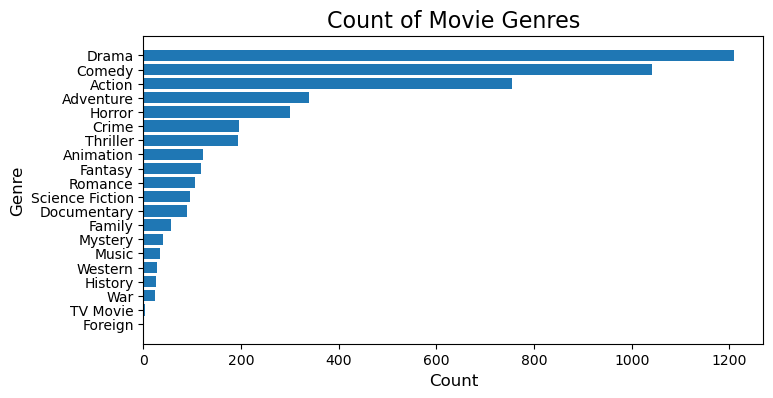

In [535]:
tmp = df2.PrimaryGenre.value_counts().sort_values()

fig, ax = plt.subplots(figsize=(8,4))
ax.barh(tmp.index, tmp.values)
ax.set_title('Count of Movie Genres', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
fig.savefig('count_movie_genres.png')
plt.show()

In [543]:
df2['LeadActor'] = df2.cast.apply(lambda x: x[0] if x is not np.nan else np.nan)

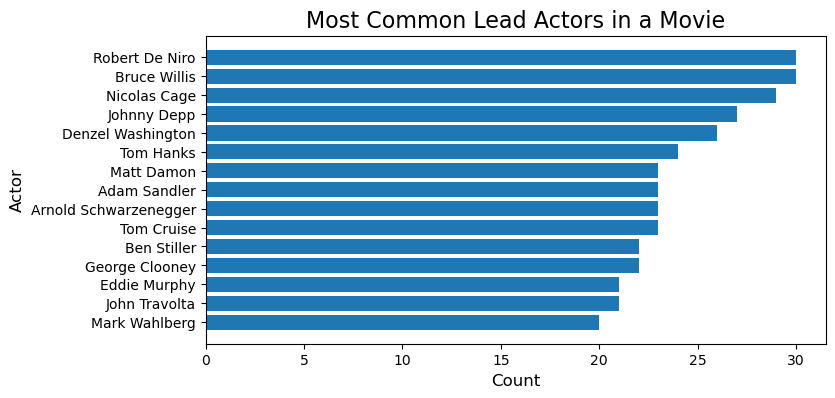

In [552]:
tmp = df2.LeadActor.value_counts().sort_values()[-15:]
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(tmp.index, tmp.values)
ax.set_title('Most Common Lead Actors in a Movie', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Actor', fontsize=12)
fig.savefig('count_actors.png')
plt.show()

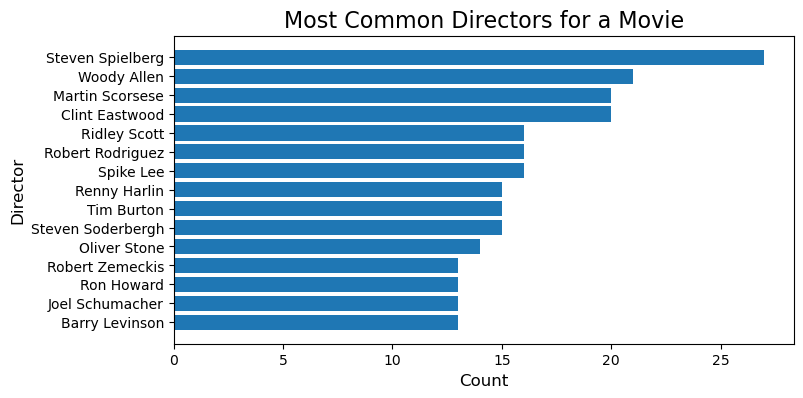

In [557]:
tmp = df2.PrimaryDirector.value_counts().sort_values()[-15:]
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(tmp.index, tmp.values)
ax.set_title('Most Common Directors for a Movie', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Director', fontsize=12)
fig.savefig('count_directors.png')
plt.show()

In [564]:
df2[['budget', 'revenue', 'profit']]

,budget,revenue,profit
0,237000000.0,2.787965e+09,2.550965e+09
1,300000000.0,9.610000e+08,6.610000e+08
2,245000000.0,8.806746e+08,6.356746e+08
3,250000000.0,1.084939e+09,8.349391e+08
4,260000000.0,2.841391e+08,2.413910e+07
...,...,...,...
4804,220000.0,2.040920e+06,1.820920e+06
4805,9000.0,5.000000e+03,-4.000000e+03
4806,NaN,NaN,NaN
4807,NaN,NaN,NaN


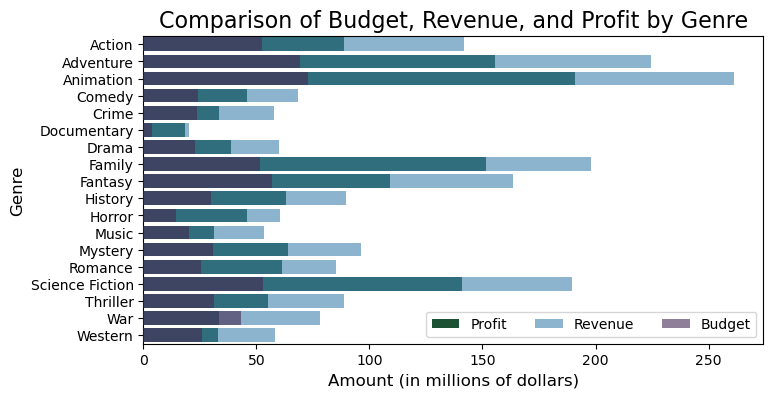

In [598]:
genre_summary = df2.groupby('PrimaryGenre').agg({'budget': 'mean', 'revenue': 'mean', 'profit': 'mean'}).reset_index()
genre_summary[['budget', 'revenue', 'profit']] = genre_summary[['budget', 'revenue', 'profit']] / 1000000
genre_summary = genre_summary[~((genre_summary.PrimaryGenre ==  'Foreign') | (genre_summary.PrimaryGenre == 'TV Movie'))]

# Plotting
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='profit', y='PrimaryGenre', data=genre_summary, label="Profit", color="#145a32", zorder=1)
sns.barplot(x='revenue', y='PrimaryGenre', data=genre_summary, label="Revenue", color="#2e86c1", alpha=0.6, zorder=2)
sns.barplot(x='budget', y='PrimaryGenre', data=genre_summary, label="Budget", color="#4a235a", alpha=0.6, zorder=3)

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set_xlabel('Amount (in millions of dollars)', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.set_title('Comparison of Budget, Revenue, and Profit by Genre', fontsize=16)
fig.savefig('genres_budget_revenue_profit.png')
plt.show()

In [760]:
indices = df2[(df2.release_year >= 2000 )& (df2.release_year < 2017)].groupby('release_year')['revenue'].idxmax()
HTML(df2.loc[indices, ['release_year', 'HTML_Poster_100px', 'title']].set_index('release_year').to_html(escape=False))

,HTML_Poster_100px,title
release_year,,
2000.0,,Mission: Impossible II
2001.0,,Harry Potter and the Philosopher's Stone
2002.0,,The Lord of the Rings: The Two Towers
2003.0,,The Lord of the Rings: The Return of the King
2004.0,,Shrek 2
2005.0,,Harry Potter and the Goblet of Fire
2006.0,,Pirates of the Caribbean: Dead Man's Chest
2007.0,,Pirates of the Caribbean: At World's End
2008.0,,The Dark Knight


In [750]:
tmp = df2.loc[indices, ['release_year', 'Poster', 'HTML_Poster_100px', 'title', 'revenue']].reset_index(drop=True)
tmp['revenue'] = tmp['revenue'] / 1000000
tmp['release_year'] = tmp['release_year'].astype(int)
tmp

,release_year,Poster,HTML_Poster_100px,title,revenue
0,2000,https://m.media-amazon.com/images/M/MV5BN2RkYW...,"<img src=""https://m.media-amazon.com/images/M/...",Mission: Impossible II,546.388105
1,2001,https://m.media-amazon.com/images/M/MV5BNmQ0OD...,"<img src=""https://m.media-amazon.com/images/M/...",Harry Potter and the Philosopher's Stone,976.475550
2,2002,https://m.media-amazon.com/images/M/MV5BZGMxZT...,"<img src=""https://m.media-amazon.com/images/M/...",The Lord of the Rings: The Two Towers,926.287400
3,2003,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,"<img src=""https://m.media-amazon.com/images/M/...",The Lord of the Rings: The Return of the King,1118.888979
4,2004,https://m.media-amazon.com/images/M/MV5BMDJhMG...,"<img src=""https://m.media-amazon.com/images/M/...",Shrek 2,919.838758
5,2005,https://m.media-amazon.com/images/M/MV5BMTI1ND...,"<img src=""https://m.media-amazon.com/images/M/...",Harry Potter and the Goblet of Fire,895.921036
6,2006,https://m.media-amazon.com/images/M/MV5BMTcwOD...,"<img src=""https://m.media-amazon.com/images/M/...",Pirates of the Caribbean: Dead Man's Chest,1065.659812
7,2007,https://m.media-amazon.com/images/M/MV5BMjIyNj...,"<img src=""https://m.media-amazon.com/images/M/...",Pirates of the Caribbean: At World's End,961.000000
8,2008,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"<img src=""https://m.media-amazon.com/images/M/...",The Dark Knight,1004.558444
9,2009,https://m.media-amazon.com/images/M/MV5BZDA0OG...,"<img src=""https://m.media-amazon.com/images/M/...",Avatar,2787.965087


In [745]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from PIL import Image
from io import BytesIO

In [714]:
def get_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

In [748]:
tmp.release_year

213    2000
197    2001
330    2002
329    2003
565    2004
114    2005
12     2006
1      2007
65     2008
0      2009
42     2010
52     2011
16     2012
124    2013
36     2014
28     2015
26     2016
Name: release_year, dtype: int64

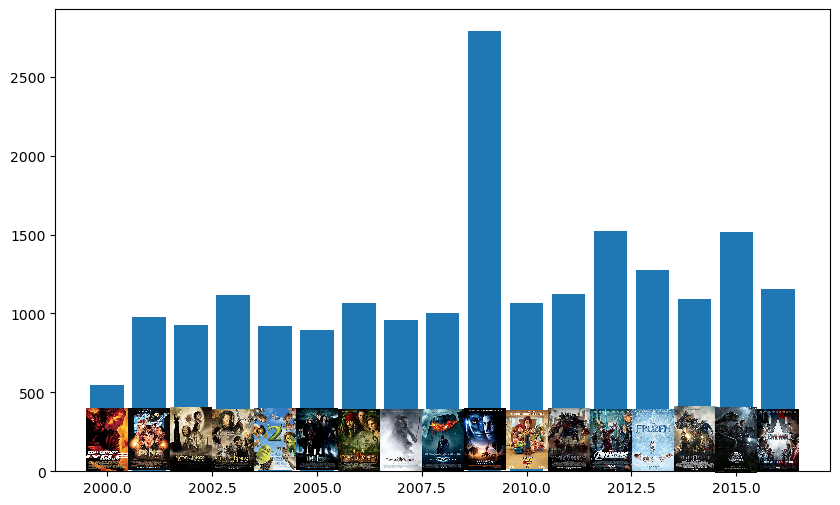

In [764]:
bar_width = 3 
fig, ax  = plt.subplots(figsize=(10,6))
ax.bar(tmp.release_year, tmp.revenue)
for i, url in enumerate(tmp.Poster):
    img = get_image_from_url(url)
    imagebox = OffsetImage(img, zoom=0.1)  # Adjust 'zoom' as needed
    ab = AnnotationBbox(imagebox, (tmp.release_year[i], 200), frameon=False)
    ax.add_artist(ab)
ax.set_xtick
plt.show()

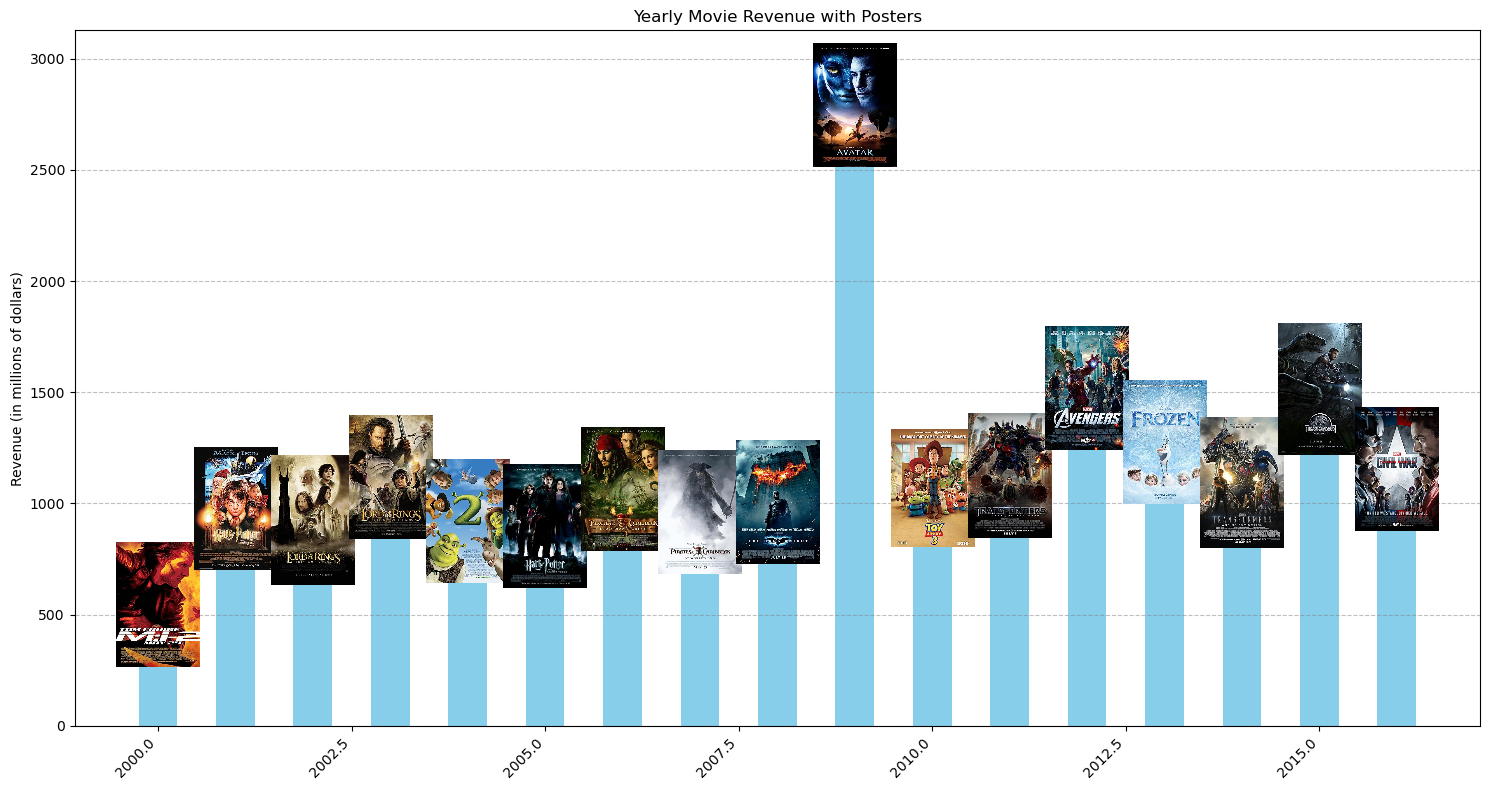

In [782]:
fig, ax = plt.subplots(figsize=(15, 8))  # Increase figure size
bar_width = 0.5  # Decrease bar width
ax.bar(tmp.release_year, tmp.revenue, width=bar_width, color='skyblue')  # Adjust bar color

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add horizontal gridlines
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Set y-axis label
ax.set_ylabel('Revenue (in millions of dollars)')

# Set title
ax.set_title('Yearly Movie Revenue with Posters')

# Adjust the image placement and size
for i, url in enumerate(tmp.Poster):
    img = get_image_from_url(url)
    imagebox = OffsetImage(img, zoom=0.2)  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (tmp.release_year[i], tmp.revenue[i]), frameon=False)  # Offset_value to adjust the image placement above the bar
    ax.add_artist(ab)
ax.set_ylim(0, ax.get_ylim()[1]+200)
# Show the plot
plt.tight_layout()  # Adjust subplot params for better fit
plt.show()

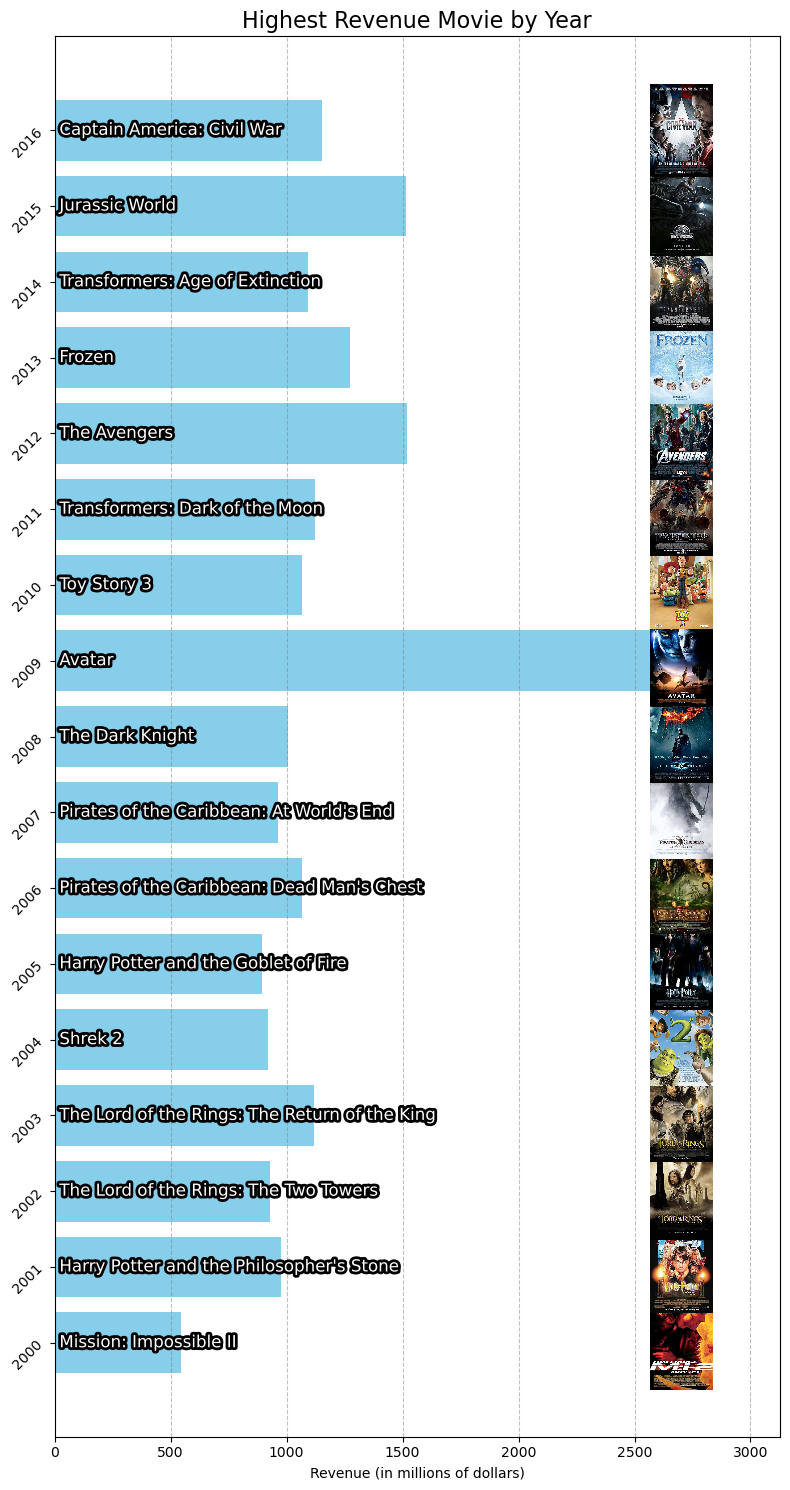

In [810]:
from matplotlib import patheffects
fig, ax = plt.subplots(figsize=(8, 15))  # Increase figure size
bar_height = 0.8  # This is now the height of the horizontal bars

# Create a horizontal bar chart
ax.barh(tmp.release_year, tmp.revenue, height=bar_height, color='skyblue')

# Rotate y-ticks for better readability
plt.yticks(rotation=45, ha='right')

# Add vertical gridlines
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# Set x-axis label (since this is now the axis for revenue)
ax.set_xlabel('Revenue (in millions of dollars)')

# Set title
ax.set_title('Highest Revenue Movie by Year', fontsize=16)

# Adjust the image placement and size for horizontal bar chart
for i, url in enumerate(tmp.Poster):
    img = get_image_from_url(url)
    imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
    # Note: The y coordinate (tmp.release_year[i]) now comes before the x coordinate (tmp.revenue[i])
    ab = AnnotationBbox(imagebox, (2700, tmp.release_year[i]), frameon=False, xycoords='data', pad=0.2)
    ax.add_artist(ab)
    
text_path_effect = [patheffects.withStroke(linewidth=4, foreground='black')]

for year, title in zip(tmp.release_year, tmp.title):
    text = ax.text(20, year, title, color='white', fontsize=12, 
                   ha='left', va='center')  # ha and va for horizontal and vertical alignment
    text.set_path_effects(text_path_effect)


# Adjust the limits to fit images
ax.set_xlim(0, ax.get_xlim()[1]+200)  # You may need to adjust this based on your data
ax.set_yticks(np.arange(2000, 2017))
# Show the plot
plt.tight_layout()  # Adjust subplot params for better fit
fig.savefig('top_movie_by_revenue_by_year.png')
plt.show()


In [3]:
df2 = pd.read_csv('movies_complete_02242024.csv')
df2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,PrimaryGenre,Directors,PrimaryDirector,Producers,PrimaryProducer,PrimaryProductionCompany,PrimaryProductionCountry,release_year,release_month,release_season,imdb_id,NumAwards,Rated,BoxOfficeRevenue,NumOscars,Poster,profit,HTML_Poster,HTML_Poster_100px,LeadActor
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['Stephen E. Rivkin', 'James Cameron', 'James ...",Action,['James Cameron'],James Cameron,"['James Cameron', 'Jon Landau']",James Cameron,Ingenious Film Partners,United States of America,2009.0,December,winter,tt0499549,90.0,PG-13,785221649.0,3.0,https://m.media-amazon.com/images/M/MV5BZDA0OG...,2.550965e+09,"<img src=""https://m.media-amazon.com/images/M/...","<img src=""https://m.media-amazon.com/images/M/...",Sam Worthington
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['Gore Verbinski', 'Jerry Bruckheimer', 'Ted E...",Adventure,['Gore Verbinski'],Gore Verbinski,"['Jerry Bruckheimer', 'Eric McLeod', 'Chad Oma...",Jerry Bruckheimer,Walt Disney Pictures,United States of America,2007.0,May,spring,tt0449088,23.0,PG-13,309420425.0,2.0,https://m.media-amazon.com/images/M/MV5BMjIyNj...,6.610000e+08,"<img src=""https://m.media-amazon.com/images/M/...","<img src=""https://m.media-amazon.com/images/M/...",Johnny Depp
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","['Sam Mendes', 'John Logan', 'Lee Smith', 'Bar...",Action,['Sam Mendes'],Sam Mendes,"['Barbara Broccoli', 'Michael G. Wilson']",Barbara Broccoli,Columbia Pictures,United Kingdom,2015.0,October,autumn,tt2379713,8.0,PG-13,200074609.0,1.0,https://m.media-amazon.com/images/M/MV5BOWQ1MD...,6.356746e+08,"<img src=""https://m.media-amazon.com/images/M/...","<img src=""https://m.media-amazon.com/images/M/...",Daniel Craig
3,250000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1.084939e+09,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","['Charles Roven', 'Christopher Nolan', 'Christ...",Action,['Christopher Nolan'],Christopher Nolan,"['Charles Roven', 'Christopher Nolan', 'Emma T...",Charles Roven,Legendary Pictures,United States of America,2012.0,July,summer,tt1345836,43.0,PG-13,448149584.0,0.0,https://m.media-amazon.com/images/M/MV5BMTk4OD...,8.349391e+08,"<img src=""htt